In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,NaN,4.0,140.0,192.0,0,NaN,NaN,NaN,NaN,NaN,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	29
float64		column 3	14
float64		column 4	21
float64		column 5	14
int64		column 6	0
float64		column 7	15
float64		column 8	29
float64		column 9	57
float64		column 10	29
float64		column 11	43
float64		column 12	28
float64		column 13	42


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,249.000000,241.000000,256.000000,249.000000,256.000000,270.000000,255.000000,241.000000,213.000000,241.000000,227.000000,242.000000,228.000000
mean,0.674699,54.825726,3.156250,131.232932,250.527344,0.148148,1.043137,150.074689,0.319249,1.059336,1.585903,0.669421,4.657895
std,0.469431,9.158939,0.961514,18.095010,52.202615,0.355906,0.997093,23.022512,0.467284,1.170829,0.620715,0.941337,1.927446
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,214.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,56.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,62.000000,4.000000,140.000000,282.000000,0.000000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

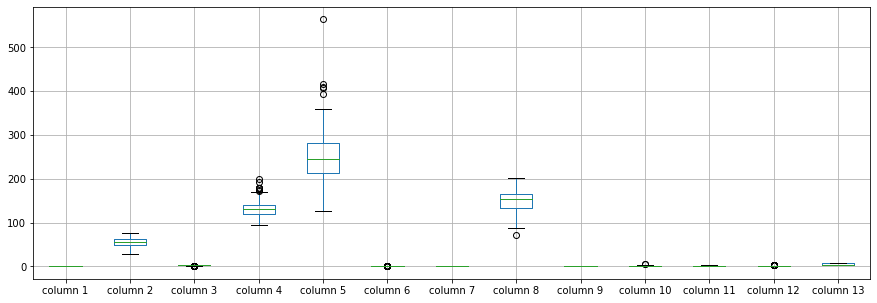

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.674699
column 2      54.825726
column 3       3.156250
column 4     131.232932
column 5     250.527344
column 6       0.148148
column 7       1.043137
column 8     150.074689
column 9       0.319249
column 10      1.059336
column 11      1.585903
column 12      0.669421
column 13      4.657895
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.108192,0.015607,-0.070320,-0.210607,0.051435,0.021160,-0.067015,0.157528,0.100740,0.009862,0.129674,0.383251
column 2,-0.108192,1.000000,0.103163,0.249147,0.222982,0.114972,0.126889,-0.406471,0.094086,0.205851,0.162682,0.384815,0.063560
column 3,0.015607,0.103163,1.000000,-0.008241,0.096296,-0.113776,0.077623,-0.312351,0.359043,0.162707,0.114510,0.222021,0.233813
column 4,-0.070320,0.249147,-0.008241,1.000000,0.173607,0.160925,0.110995,-0.064748,0.115050,0.275177,0.193629,0.098621,0.139585
column 5,-0.210607,0.222982,0.096296,0.173607,1.000000,0.021640,0.154826,-0.016889,0.052523,0.021946,0.014930,0.125680,0.058157
column 6,0.051435,0.114972,-0.113776,0.160925,0.021640,1.000000,0.026125,0.066324,-0.074619,-0.053188,-0.006756,0.094677,0.025917
column 7,0.021160,0.126889,0.077623,0.110995,0.154826,0.026125,1.000000,-0.055885,0.020666,0.110230,0.172203,0.088695,-0.039210
column 8,-0.067015,-0.406471,-0.312351,-0.064748,-0.016889,0.066324,-0.055885,1.000000,-0.355570,-0.346850,-0.403208,-0.225798,-0.229293
column 9,0.157528,0.094086,0.359043,0.115050,0.052523,-0.074619,0.020666,-0.355570,1.000000,0.258391,0.274712,0.145767,0.317374
column 10,0.100740,0.205851,0.162707,0.275177,0.021946,-0.053188,0.110230,-0.346850,0.258391,1.000000,0.634657,0.280223,0.303274


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [13]:
imputer = md.Midas(layer_structure = [13,13+6,13+6+6,13+6+6+6,13+6+6+6+6,13+6+6+6+6+6,13+6+6+6+6,13+6+6+6,13+6+6,13+6,13], vae_layer = False, seed = 6)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 562.5969696044922
Epoch: 1 , loss: 564.1557540893555
Epoch: 2 , loss: 561.254903793335
Epoch: 3 , loss: 564.4242057800293
Epoch: 4 , loss: 563.4041786193848
Epoch: 5 , loss: 562.6784992218018
Epoch: 6 , loss: 564.4923400878906
Epoch: 7 , loss: 561.0864295959473
Epoch: 8 , loss: 564.2030944824219
Epoch: 9 , loss: 562.5475406646729
Epoch: 10 , loss: 565.3068885803223
Epoch: 11 , loss: 563.2290534973145
Epoch: 12 , loss: 562.2209968566895
Epoch: 13 , loss: 562.7126426696777
Epoch: 14 , loss: 562.4302406311035
Epoch: 15 , loss: 559.9190521240234
Epoch: 16 , loss: 560.5693283081055
Epoch: 17 , loss: 562.6256160736084
Epoch: 18 , loss: 563.3787899017334
Epoch: 19 , loss: 564.4719848632812
Epoch: 20 , loss: 567.6784439086914
Epoch: 21 , loss: 561.5308876037598
Epoch: 22 , loss: 560.3375396728516
Epoch: 23 , loss: 565.9284858703613
Epoch: 24 , loss: 563.0465183258057
Epoch: 25 , loss: 562.5370025634766
Epoch: 

In [14]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [15]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2       0.666851
column 3       2.000000
column 4       0.673736
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.320294
column 10      0.200000
column 11      0.646950
column 12      0.494509
column 13      0.659096
Name: 21, dtype: float64

In [16]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [17]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
266,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
267,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0
268,0.0,-55.947711,0.0,0.0,0.0,0,0.925593,-146.94702,0.489342,0.49758,-0.980333,0.0,0.0


Calculating NRMSE Value

In [18]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [19]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [20]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1364.800044894036, 5414.752392307519)

In [21]:
NRMS=numerator/denominator
NRMS


0.25205216157860566

In [22]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.000000,4.0,130.0,322.0,0,2.000000,109.00000,0.000000,2.40000,2.000000,3.0,3.0
1,0.0,67.000000,3.0,115.0,564.0,0,2.000000,160.00000,0.000000,1.60000,2.000000,0.0,7.0
2,1.0,57.000000,2.0,124.0,261.0,0,0.000000,141.00000,0.000000,0.30000,1.000000,0.0,7.0
3,1.0,64.000000,4.0,128.0,263.0,0,0.000000,105.00000,1.000000,0.20000,2.000000,1.0,7.0
4,0.0,74.000000,2.0,120.0,269.0,0,2.000000,121.00000,1.000000,0.20000,1.000000,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,3.0,172.0,199.0,1,0.000000,162.00000,0.000000,0.50000,1.000000,0.0,7.0
266,1.0,44.000000,2.0,120.0,263.0,0,0.000000,173.00000,0.000000,0.00000,1.000000,0.0,7.0
267,0.0,56.000000,2.0,140.0,294.0,0,2.000000,153.00000,0.000000,1.30000,2.000000,0.0,3.0
268,1.0,1.052289,4.0,140.0,192.0,0,0.925593,1.05298,0.489342,0.89758,1.019667,0.0,6.0


In [24]:
imputations[-1].to_excel("Sheart_AW_10(imp).xlsx", index=False, header=False)